In [131]:
import pandas as pd
df = pd.read_parquet('2013_demand_datetime.snappy.parquet')

In [201]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

pred = []
tests = []

for i in range(0,1):

    #split data into training and testing
    start = i*48*7*4
    end = (i+1)*48*7*4
    train = df[start:end].iloc[:-48]
    test = df[start:end].iloc[-48:]

    #train ARIMA model using traing data
    model = ARIMA(train.ENGLAND_WALES_DEMAND, order = (48,0,1))
    
    model = SARIMAX(train.ENGLAND_WALES_DEMAND, 
                order = (48, 0, 1), 
                seasonal_order =(1,0,))
    model = model.fit()


    start = start + len(train)
    end = start + 47
    new_pred = model.predict(start = len(train), end = len(train) + 47, type = 'levels')

    #store the prediction and testing data for anaalysis
    new_pred.index = df[start:end+1].datetime
    test.index = df[start:end+1].datetime
    pred.append(new_pred)
    tests.append(test)

C:\Users\fiona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='datetime'>

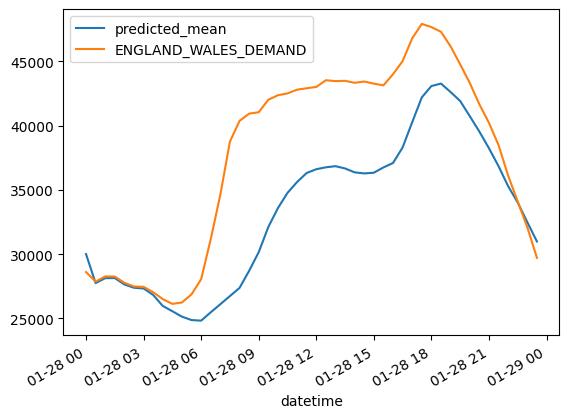

In [202]:
pred[0].plot(legend = True)
tests[0].ENGLAND_WALES_DEMAND.plot(legend = True)